# 1
In this Kernel we wil explore the `audit` dataset and create predictive metrics using various ML models, we will achieve this by:
- loading all the necessary dependencies 
- loading the dataset 
- Exploratory analysis 
- - (Data Seummary and Visualization)
- Feature Selection
- Data Splitting 
- Comparing the ML models
- - We check for overfitting by comparing the accuracies of the train and test predictions.
- Printing a result

In [1]:
# Load Libraries
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Load DataSet

#### Audit Dataset


In [2]:
audit_Df = pd.read_csv('C:/Users/HP/Documents/ML/Py_Dataset/audit_data/audit_data/audit_risk.csv')
audit_Df.head().T

,0,1,2,3,4
Sector_score,3.89,3.89,3.89,3.89,3.89
LOCATION_ID,23,6,6,6,6
PARA_A,4.18,0,0.51,0,0
Score_A,0.6,0.2,0.2,0.2,0.2
Risk_A,2.508,0,0.102,0,0
PARA_B,2.5,4.83,0.23,10.8,0.08
Score_B,0.2,0.2,0.2,0.6,0.2
Risk_B,0.5,0.966,0.046,6.48,0.016
TOTAL,6.68,4.83,0.74,10.8,0.08
numbers,5,5,5,6,5


Fillna for Money_Value
    After trying to fill by mean and getting an outrageous comparative value, instead of trying other methods of filling for missing values. I will just drop the whole index, and then drop `Total`, which is just the total of `PARA_A B` and `LOCATION_ID` as they not significant for prediction process.

In [3]:
audit_Df.drop(642, inplace = True)
audit_Df.drop(columns = ['LOCATION_ID', 'TOTAL'], inplace = True)
audit_Df = audit_Df.reset_index(drop = True)
audit_Df.shape

(775, 25)

In [4]:
# Data Summary
audit_Df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,...,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.0,775.000000,775.000000
mean,20.138877,2.453059,0.351484,1.352712,10.813924,0.313290,6.342181,5.067742,0.223742,1.153161,...,0.519226,0.104516,0.216774,0.053677,2.703484,17.701560,0.572903,0.5,7.177034,0.393548
std,24.301417,5.681977,0.174082,3.442348,50.114461,0.169865,30.091403,0.264608,0.080399,0.537736,...,0.290468,0.531360,0.068028,0.306027,0.859106,54.772482,0.444825,0.0,38.691674,0.488852
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.584000,0.400000,0.5,0.316800,0.000000
50%,3.890000,0.880000,0.200000,0.176000,0.410000,0.200000,0.082000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.556000,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.887000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,3.300000,10.703000,0.400000,0.5,3.252600,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,9.000000,0.600000,5.400000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


### Data Visualization
- Univariate Plots to understand each variables
- Multivariate Plots to better understan relationships

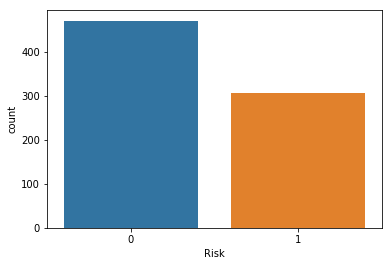

In [5]:
#Visualizing our Predictor
sns.countplot(audit_Df['Risk'], label = 'Count')
plt.show()

We can see from the plot that we have less Risky Companies*

### Feature Selection

In [6]:
# Only Features
X = audit_Df.drop(columns = 'Risk')

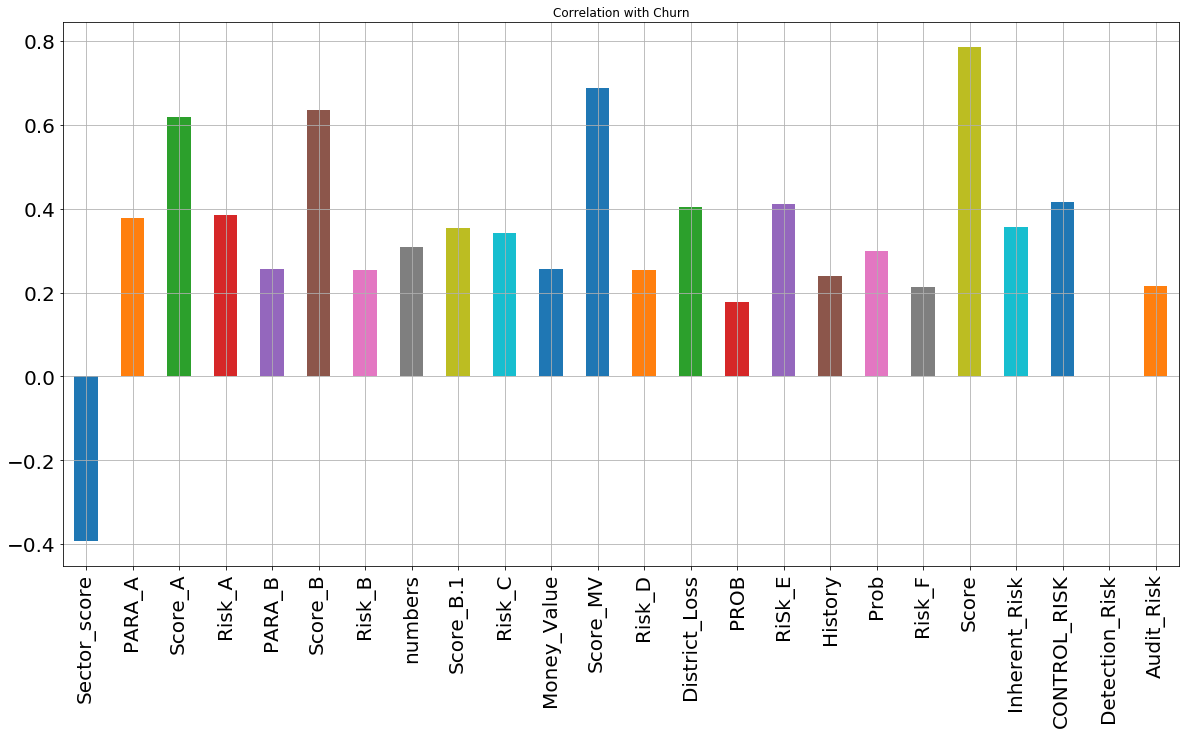

In [7]:
# Cheecking for Correlation
X.corrwith(audit_Df.Risk).plot.bar(figsize = (20, 10), 
                                   title = "Correlation with Diabetes", 
                                   fontsize = 20, rot = 90, grid = True)
plt.show()

In [8]:
X.corrwith(audit_Df['Risk']).abs().sort_values(ascending = False)

Score             0.785813
Score_MV          0.688207
Score_B           0.635524
Score_A           0.619383
CONTROL_RISK      0.416285
RiSk_E            0.411594
District_Loss     0.403591
Sector_score      0.393322
Risk_A            0.384869
PARA_A            0.378547
Inherent_Risk     0.356881
Score_B.1         0.353664
Risk_C            0.342006
numbers           0.308017
Prob              0.298520
Money_Value       0.256992
PARA_B            0.256920
Risk_B            0.255181
Risk_D            0.254253
History           0.239354
Audit_Risk        0.217023
Risk_F            0.214423
PROB              0.176818
Detection_Risk         NaN
dtype: float64

From the above we can see that Sector_Score and Detection_Risk do not correlate positively or at all with Y.

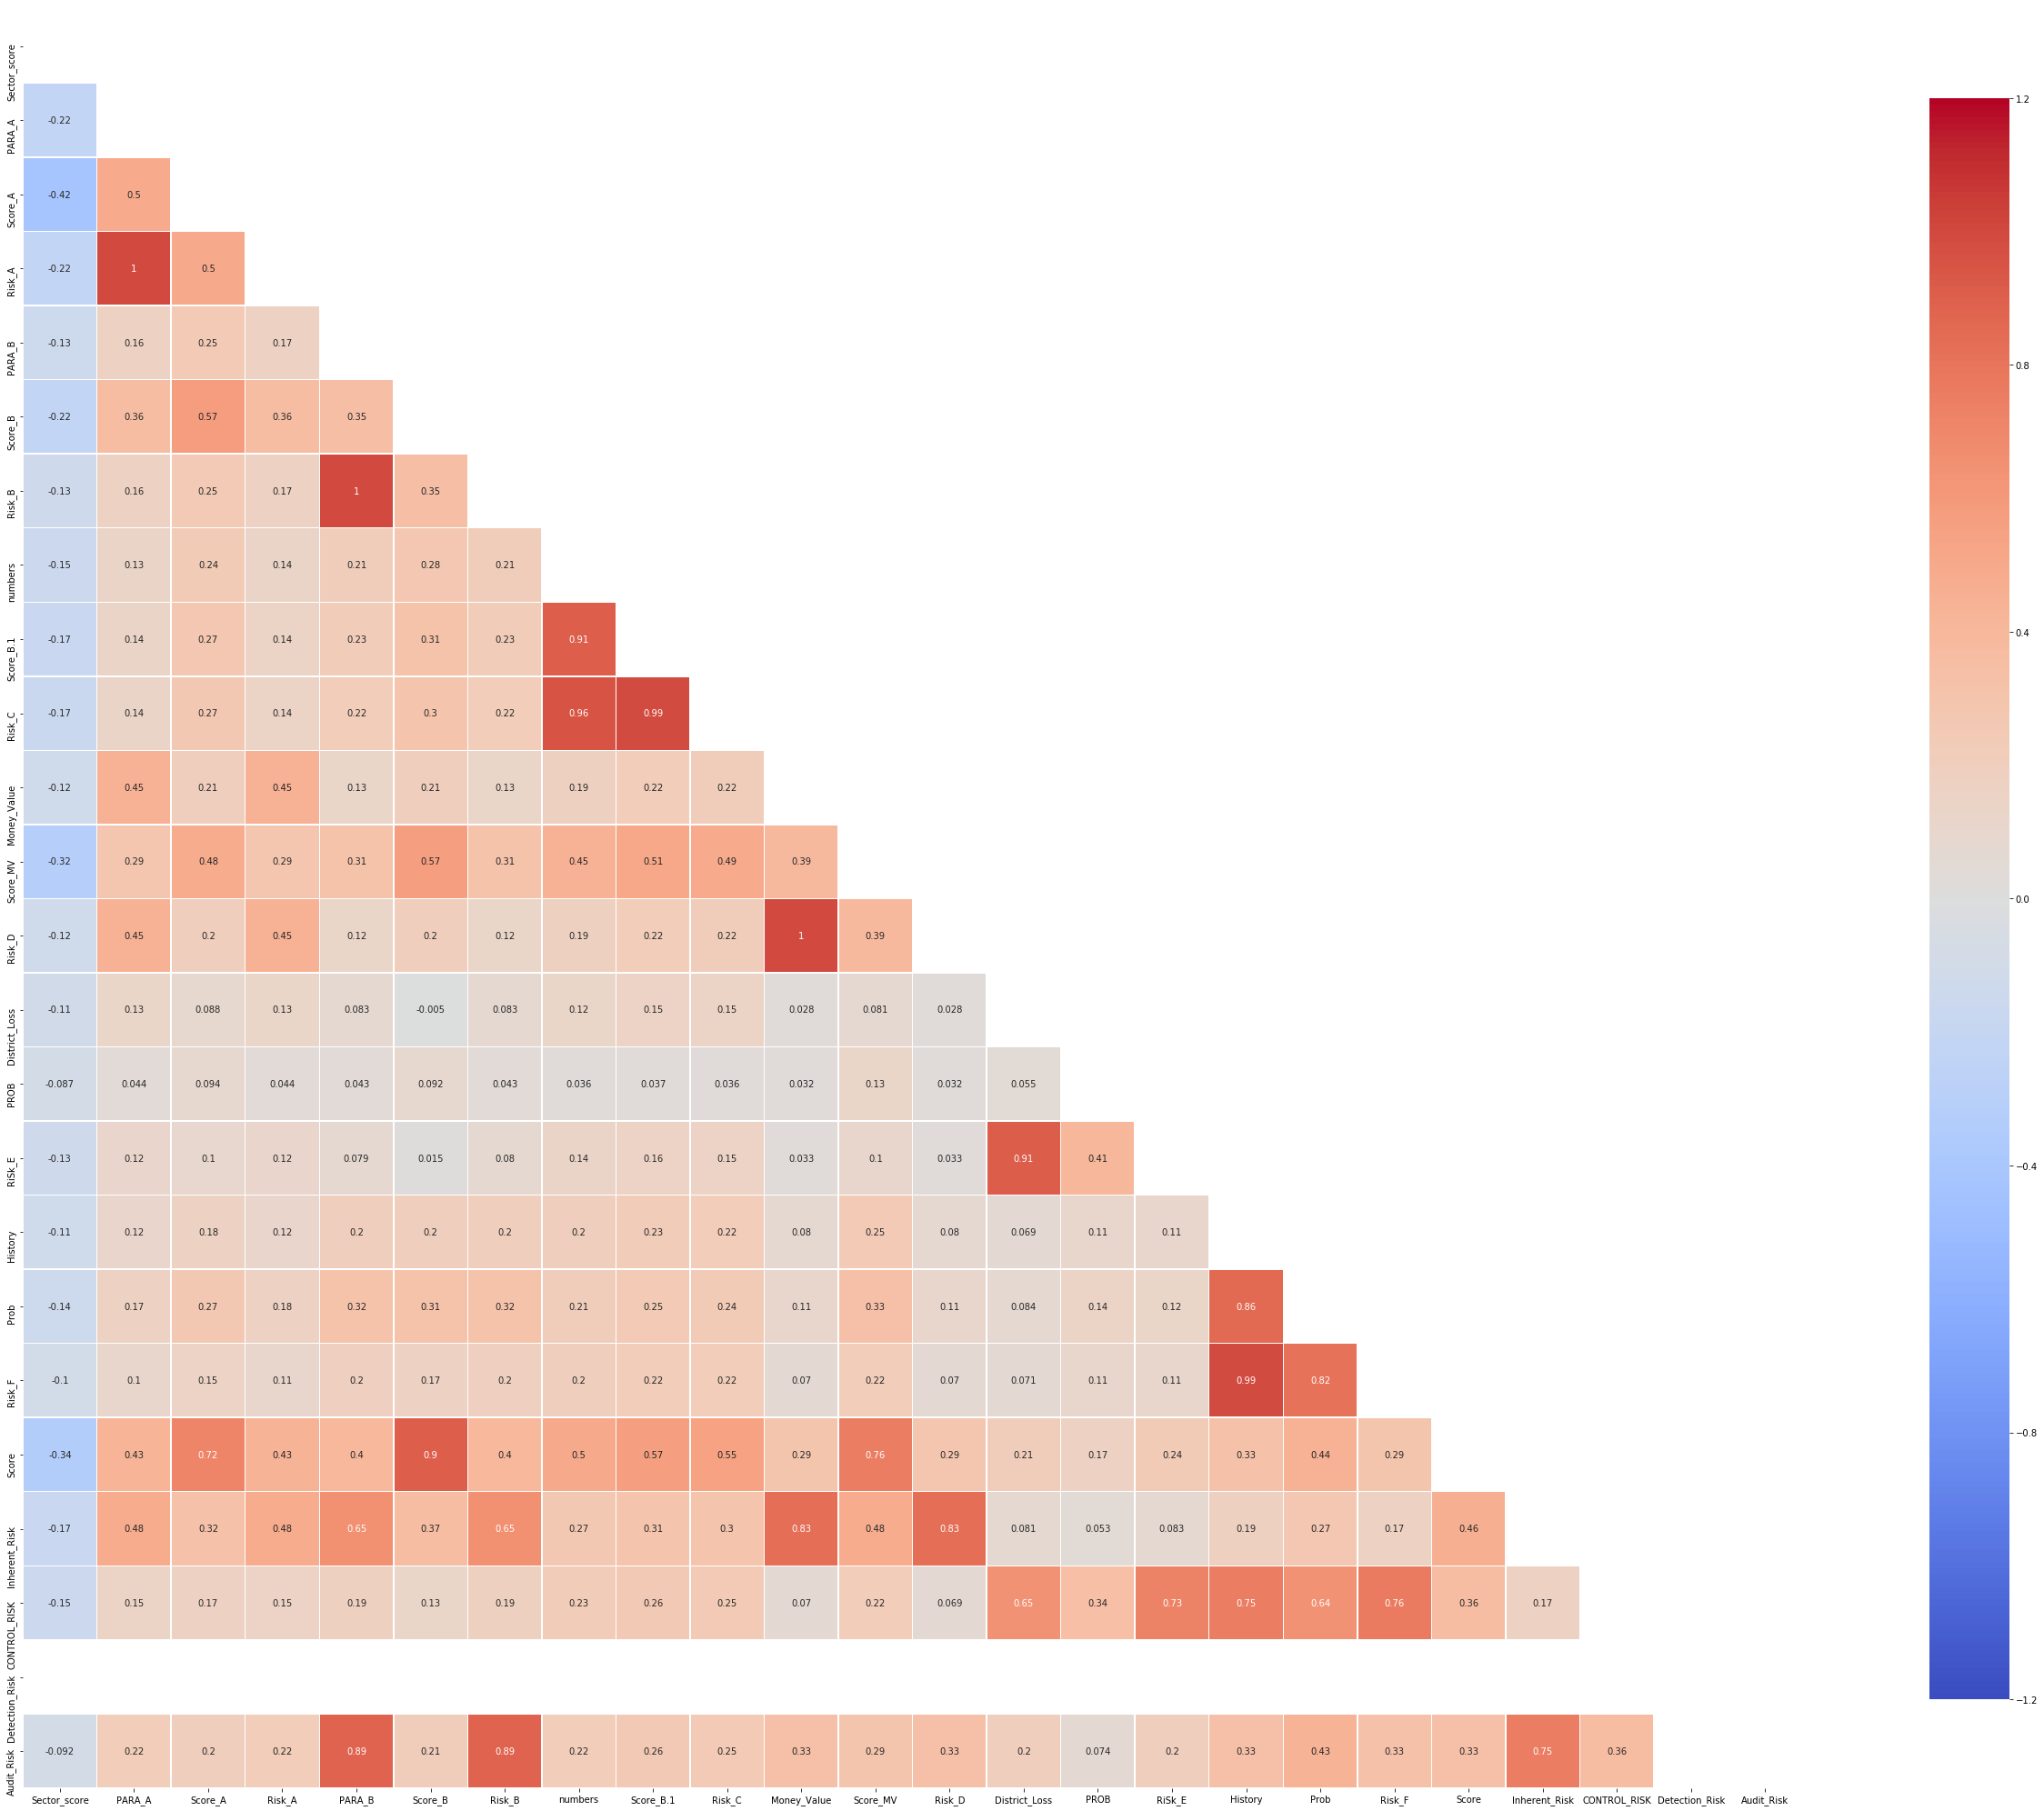

In [9]:
f, ax = plt.subplots(figsize= (50,36))

mask = np.zeros_like(X.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(X.corr(), mask=mask, center=0, 
            square=True, linewidths=.5,
            cbar_kws={"shrink": .9}, vmin=-1.2,
            vmax=1.2, cmap='coolwarm', annot=True)
plt.show()

In [10]:
# How do the features correlate with each other
X.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis = 1)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Sector_score,1.0,-0.22,-0.42,-0.22,-0.13,-0.22,-0.13,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.17,-0.15,nan,-0.092
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.48,0.15,nan,0.22
Score_A,-0.42,0.5,1.0,0.5,0.25,0.57,0.25,0.24,0.27,0.27,0.21,0.48,0.2,0.088,0.094,0.1,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.2
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.28,0.31,0.3,0.21,0.57,0.2,-0.005,0.092,0.015,0.2,0.31,0.17,0.9,0.37,0.13,nan,0.21
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,1.0,0.91,0.96,0.19,0.45,0.19,0.12,0.036,0.14,0.2,0.21,0.2,0.5,0.27,0.23,nan,0.22
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26
Risk_C,-0.17,0.14,0.27,0.14,0.22,0.3,0.22,0.96,0.99,1.0,0.22,0.49,0.22,0.15,0.036,0.15,0.22,0.24,0.22,0.55,0.3,0.25,nan,0.25


In [11]:
X.drop(columns = 'Detection_Risk', inplace = True)

In [12]:
X.shape, X.columns, X.columns[:21]

((775, 23),
 Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
        'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
        'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
        'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk'],
       dtype='object'),
 Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
        'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
        'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
        'Risk_F', 'Score', 'Inherent_Risk'],
       dtype='object'))

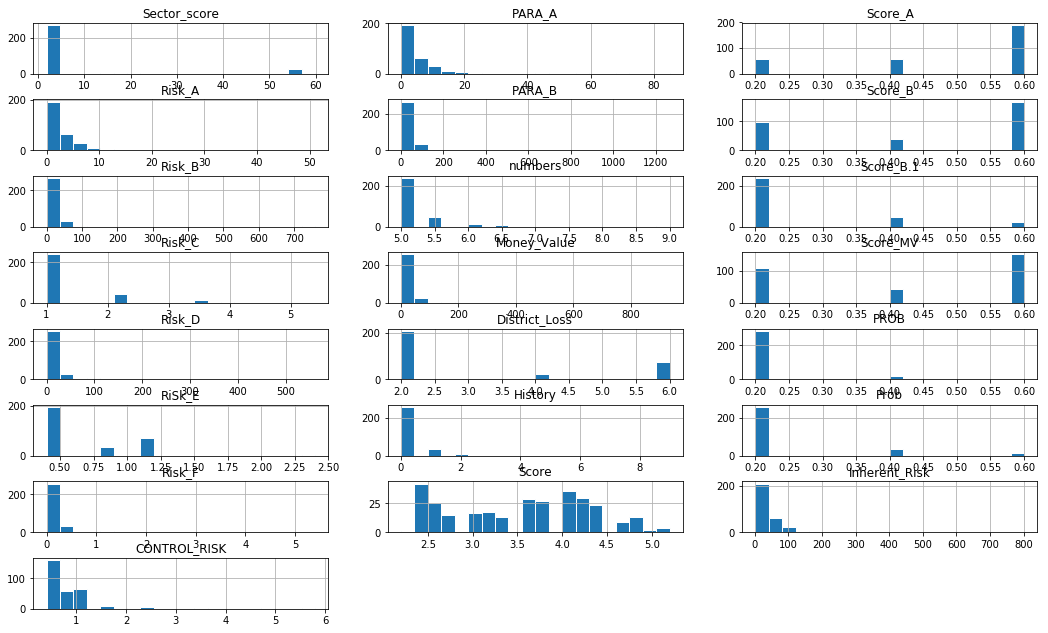

In [13]:
# Histogram
import itertools
audit_RDf = audit_Df[audit_Df['Risk'] == 1] #
columns = audit_RDf.columns[:22]
plt.subplots(figsize = (18,15))
length = len(columns)
for i,j in itertools.zip_longest(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    audit_RDf[i].hist(bins = 20, edgecolor = 'white')
    plt.title(i)
plt.show()

In [14]:
y = audit_Df['Risk']

## Train Test Split

### Evaluate Some Algorithms
- Separate the validation dataset
- Set-up the test harness to use 10-fold cross validation
- Build multiple disfferent models to predict risk from our features
- Select the best model

In [15]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, 
                                                          test_size = 0.2, stratify = y,
                                                          random_state = 123)

In [16]:
X_train.shape, X_validation.shape

((620, 23), (155, 23))

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))
X_validation_scaled = pd.DataFrame(sc_X.fit_transform(X_validation))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Applying BaseModel: Logistic Regression

In [18]:
logee = LogisticRegression(random_state = 0, penalty = 'l1')
#l1 penalty with SAGA solver (allowing 'multinomial' + L1)
logee.fit(X_train_scaled, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Cross Validation

In [19]:
from sklearn import model_selection 
kfold = model_selection.KFold(n_splits = 10, random_state = 7)
scoring = 'accuracy' # I know..

acc_logee = cross_val_score(estimator = logee, X = X_train_scaled, y = y_train, cv = kfold, scoring = 'accuracy')
acc_logee.mean()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

0.9774193548387098

### Model Evaluation

In [20]:
y_predict_logee = logee.predict(X_validation_scaled) # Validating our prediction, the following as metrics to check for accuracy
acc = accuracy_score(y_validation, y_predict_logee)
roc = roc_auc_score(y_validation, y_predict_logee)
prec = precision_score(y_validation, y_predict_logee)
rec = recall_score(y_validation, y_predict_logee)
f1 = f1_score(y_validation, y_predict_logee)

results = pd.DataFrame([['Logistic Regression', acc, acc_logee.mean(), prec, rec, f1, roc]], 
                      columns = ['Model', 'Accuracy', 'Cross Val Accuracy', 
                                 'Precision', 'Recall', 'F1 Score', 'ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.954839,0.977419,0.921875,0.967213,0.944,0.957011


#### Applying Random Forest

In [21]:
random_forest_e = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 47)
random_forest_e.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False)

### Cross Validation

In [22]:
acc_rande = cross_val_score(estimator = random_forest_e, 
                            X = X_train_scaled, y = y_train, 
                            cv = kfold, scoring = 'accuracy')
acc_rande.mean()

0.9983870967741936

### Model Evaluation

Here we want to compare the results of models.

In [23]:
y_predict_r = random_forest_e.predict(X_validation_scaled) #using our random_forest model to predict the test data
roc = roc_auc_score(y_validation, y_predict_r)
acc = accuracy_score(y_validation, y_predict_r)
prec = precision_score(y_validation, y_predict_r)
rec = recall_score(y_validation, y_predict_r)
f1 = f1_score(y_validation, y_predict_r)

model_results = pd.DataFrame([['Random Forest', acc, acc_rande.mean(), 
                               prec, rec, f1, roc]],
                            columns = ['Model', 'Accuracy', 
                                       'Cross Val Accuracy', 'Precision',
                                      'Recall', 'F1 Score', 'ROC'])
results2 = results.append(model_results, ignore_index = True)
results2

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.954839,0.977419,0.921875,0.967213,0.94400,0.957011
1,Random Forest,0.967742,0.998387,0.924242,1.000000,0.96063,0.973404


## Testing for Overfitting: Comparing Predictions in both sets.

In [49]:
y_predict_train_log = logee.predict(X_train_scaled)
tr = accuracy_score(y_train, y_predict_train_log)

y_predict_val_log = logee.predict(X_validation_scaled)
tt = accuracy_score(y_validation, y_predict_val_log)
print('Train Accuracy: {:.4f}, \nTest Accuracy: {:.4f}, \nDifference**: {:.4f} '.
      format(tr, tt, tr - tt) )

Train Accuracy: 0.9839, 
Test Accuracy: 0.9548, 
Difference**: 0.0290 


In [50]:
y_predict_train_r = random_forest_e.predict(X_train_scaled)
tr = accuracy_score(y_train, y_predict_train_r)

y_predict_val_r = random_forest_e.predict(X_validation_scaled)
tt = accuracy_score(y_validation, y_predict_val_r)
print('Train Accuracy: {:.4f}, \nTest Accuracy: {:.4f}, \nDifference**: {:.4f} '.
      format(tr, tt, tr - tt) )

Train Accuracy: 1.0000, 
Test Accuracy: 0.9677, 
Difference**: 0.0323 


In both models our differences are quite small and suggest no sign of overfitting, although the RFClassifier creates an more accurate model of the dataset, it thens to less comparable accuracy than the Logistic Regression.

In [59]:
a = []
for i in audit_Df.columns:
    if audit_Df[i].dtype == 'object':
        a.append(i)
    return a

SyntaxError: 'return' outside function (<ipython-input-59-34e70002e52d>, line 5)

### Plotting ROC AUC Curve

ROC: Reciever Operating characteristic

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


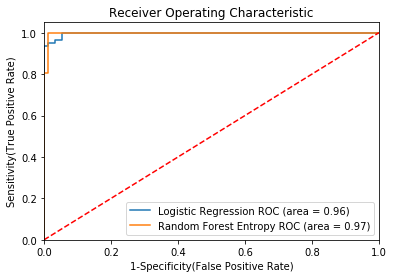

In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()
# We add models to the list that you want to view on the ROC plot
models = [
    {
        'label' : 'Logistic Regression',
        'model' : LogisticRegression(random_state = 0, penalty = 'l1'),
    },
    {
        'label' : 'Random Forest Entropy',
        'model' : RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 47),
    },
]

# Below for loop iterates through our models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_validation_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_validation, model.predict_proba(X_validation_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_validation,model.predict(X_validation_scaled))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

Let's now define the most basic terms, which are whole numbers (not rates):

- true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
- true negatives (TN): We predicted no, and they don't have the disease.
- false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
- false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

Please See EndNotes

In [27]:
61/125

0.488

In [ ]:
# Visualizing CMatrix for Logistic Regression
cm_logee = confusion_matrix(y_validation, y_predict_logee)
plt.title('Confusion matrix of the Logistic classificatier')
sns.heatmap(cm_logee, annot = True, fmt='d')
plt.show()

In [ ]:
# Visualizing CMatrix for Random Forest
cm_rf = confusion_matrix(y_validation, y_predict_r)
plt.title('Confusion matrix of the Random Forest')
sns.heatmap(cm_rf, annot = True, fmt='d')
plt.show()

### Feature Importance Plot

In [ ]:
importances = random_forest_e.feature_importances_
indices = np.argsort(importances)[::-1] # for a list values, values[::-1] returns a list in reverse order.

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices] # Clever!

#create plot
plt.figure()

#create plot title
plt.title('Feature Importance')

#Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

Exhaustive one year non-confidential data in the year 2015 to 2016 of firms is collected from the Auditor Office of India to build a predictor for classifying suspicious firms.
Data Set Information:

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).



Attribute Information:

Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


# EndNotes

This is a list of rates that are often computed from a confusion matrix for a binary classifier:

- Accuracy: Overall, how often is the classifier correct?
(TP+TN)/total = (100+50)/165 = 0.91
- Misclassification Rate: Overall, how often is it wrong?
(FP+FN)/total = (10+5)/165 = 0.09; equivalent to 1 minus Accuracy, also known as "Error Rate"
- True Positive Rate: When it's actually yes, how often does it predict yes?
TP/actual yes = 100/105 = 0.95, also known as "Sensitivity" or "Recall"
- False Positive Rate: When it's actually no, how often does it predict yes?
FP/actual no = 10/60 = 0.17
- True Negative Rate: When it's actually no, how often does it predict no?
TN/actual no = 50/60 = 0.83, equivalent to 1 minus False Positive Rate, also known as "Specificity"
- Precision: When it predicts yes, how often is it correct?
TP/predicted yes = 100/110 = 0.91
- Prevalence: How often does the yes condition actually occur in our sample?
actual yes/total = 105/165 = 0.64

#### A couple other terms are also worth mentioning:

- Null Error Rate: This is how often you would be wrong if you always predicted the majority class. (In our example, the null error rate would be 60/165=0.36 because if you always predicted yes, you would only be wrong for the 60 "no" cases.) This can be a useful baseline metric to compare your classifier against. However, the best classifier for a particular application will sometimes have a higher error rate than the null error rate, as demonstrated by the Accuracy Paradox.

- Cohen's Kappa: This is essentially a measure of how well the classifier performed as compared to how well it would have performed simply by chance. In other words, a model will have a high Kappa score if there is a big difference between the accuracy and the null error rate. (More details about Cohen's Kappa.)

- F Score: This is a weighted average of the true positive rate (recall) and precision. (More details about the F Score.)
- ROC Curve: This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. (More details about ROC Curves.)

And finally, for Bayesian statistics, here's a quick summary of these terms from Applied Predictive - Modeling:

** In relation to Bayesian statistics, the sensitivity and specificity are the conditional probabilities, the prevalence is the prior, and the positive/negative predicted values are the posterior probabilities.**